# HYPOTHESIS TESTING FOR LIFE EXPECTANCY DATASET

In this section I will be testing some hypothetical statements based on the data set to get more insights on the data.

### Importing Required Libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

### Reading and Understanding the data

In [8]:
data = pd.read_csv(r'C:\Users\HP\Desktop\My documents\Life_Expectancy data.csv')
data.head()

,Country,Year,Status,LifeExpectancy,Adult_Mortality,infant deaths,Alcohol,HIV/AIDS,GDP,Population,Measles,BMI,under-five deaths,Polio
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,0.1,584.259210,33736494.0,1154,19.1,83,6.0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,0.1,612.696514,327582.0,492,18.6,86,58.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,0.1,631.744976,31731688.0,430,18.1,89,62.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,0.1,669.959000,3696958.0,2787,17.6,93,67.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,0.1,63.537231,2978599.0,3013,17.2,97,68.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             2938 non-null   object 
 1   Year                2938 non-null   int64  
 2   Status              2938 non-null   object 
 3   LifeExpectancy      2938 non-null   float64
 4   Adult_Mortality     2938 non-null   float64
 5   infant deaths       2938 non-null   int64  
 6   Alcohol             2938 non-null   float64
 7   HIV/AIDS            2938 non-null   float64
 8   GDP                 2938 non-null   float64
 9   Population          2938 non-null   float64
 10  Measles             2938 non-null   int64  
 11  BMI                 2938 non-null   float64
 12  under-five deaths   2938 non-null   int64  
 13  Polio               2938 non-null   float64
dtypes: float64(8), int64(4), object(2)
memory usage: 321.5+ KB


In [10]:
data.describe()

,Year,LifeExpectancy,Adult_Mortality,infant deaths,Alcohol,HIV/AIDS,GDP,Population,Measles,BMI,under-five deaths,Polio
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,1.742103,6611.523863,1.023085e+07,2419.592240,38.381178,42.035739,82.617767
std,4.613841,9.509115,124.086215,117.926501,3.921946,5.077785,13296.603449,5.402242e+07,11467.272489,19.935375,160.445548,23.367166
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.100000,1.681350,3.400000e+01,0.000000,1.000000,0.000000,3.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,0.100000,580.486996,4.189172e+05,0.000000,19.400000,0.000000,78.000000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,0.100000,1766.947595,1.386542e+06,17.000000,43.500000,4.000000,93.000000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,0.800000,4779.405190,4.584371e+06,360.250000,56.100000,28.000000,97.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,50.600000,119172.741800,1.293859e+09,212183.000000,87.300000,2500.000000,99.000000


## Steps in Hypothesis Testing

Below are the steps involved in hypothesis testing according to the 'Exploratory Data Analysis for Machine Learning' course IBM Machine Learning Professional course.

#### 1. Choose a sample statistic
The first step in hypothesis testing is to choose a sample test statistic. Hypothesis testing allows us to check the sample statistic against a statistic of another sample or population. 

#### Define hypothesis (Null and Alternative)

The next step is to define the hypothesis to be tested. Hypothesis is defined in two ways - null hypothesis and alternative hypothesis. Null hypothesis is a statistical hypothesis which assumes that the difference in observations is due to a random factor. It is denoted by Ho. Alternative hypothesis is the opposite of null hypothesis. It assumes that the difference in observations is the result of a real effect. The alternate hypothesis is denoted by H1.

$ 𝐻\_{0}:\mu\_{1}-\mu\_{2} = 0 $ There is no difference between the life expectancy of Developing countries and Life Expectancy of Developed countries. \
$ 𝐻\_{A}:\mu\_{1}-\mu\_{2} != 0 $ There is difference between the Life Expectancy of Dveloping countries and Life Expectancy of Developed countries.
​
The equal sign in the null hypothesis indicates that it is a 2-tailed test.

## Hypothesis Testing

#### Hypothesis 1

In [11]:
developing=data.loc[data.Status=="Developing"]
developed=data.loc[data.Status=="Developed"]

In [12]:
#selecting life expectancy for both status
life1 = developing.LifeExpectancy
life2 = developed.LifeExpectancy

<AxesSubplot:xlabel='LifeExpectancy', ylabel='Density'>

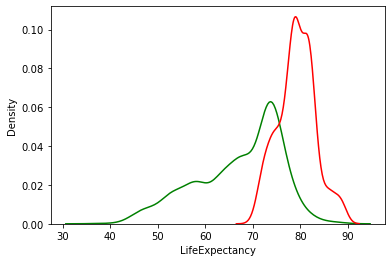

In [13]:
#ploting distribution values of both status and Lifeexpectancy
sns.distplot(life1,color='green',hist=False)
sns.distplot(life2,color='red',hist=False)

In [15]:
#calculating the mean of both Status
developing.LifeExpectancy.mean()

67.1320280296786

In [16]:
developed.LifeExpectancy.mean()

79.19785156249996

Next, I will be working on obtaining statistics, t-value and p-value. I will be using `scipy.stats` library and `ttest_ind()` function to calculate these parameters.

In [17]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(life2, life1)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  29.761100633626537 , p_value1 =  2.4795184014039213e-170


In [18]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between life expectancy of developing countries and life expectancy of developed countries.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between life expectancy of developing and life expectancy of developed countries.")

Conclusion: since p_value 2.4795184014039213e-170 is less than alpha 0.05 
Reject the null hypothesis that there is no difference between life expectancy of developing countries and life expectancy of developed countries.


#### From the above conclusion it can be deduced that there is indeed differrences between the life expectancy of both developing and developed countries

#### Hypothesis 2

In [19]:
#status and bmi
developing=data.loc[data.Status=="Developing"]
developed=data.loc[data.Status=="Developed"]

In [20]:
bmi1 = developing.BMI
bmi2 = developed.BMI

<AxesSubplot:xlabel='BMI', ylabel='Density'>

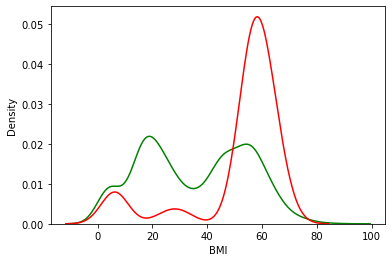

In [21]:
#ploting distribution values of both status and bmi
sns.distplot(bmi1,color='green',hist=False)
sns.distplot(bmi2,color='red',hist=False)

In [22]:
#calculating the mean of both Status
developing.BMI.mean()

35.54835119538331

In [23]:
developed.BMI.mean()

51.80390624999999

In [25]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(bmi2, bmi1)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  17.62804698291227 , p_value1 =  3.431760342326276e-66


In [26]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between BMI of developing countries and BMI of developed countries.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between BMI of developing and BMI of developed countries.")

Conclusion: since p_value 3.431760342326276e-66 is less than alpha 0.05 
Reject the null hypothesis that there is no difference between BMI of developing countries and BMI of developed countries.


#### From the above conclusion it can be deduced that there is indeed differrences between the BMI of both developing and developed countries

### Pearson’s Correlation Coefficient
In this section, I will be testing whether two samples have a linear relationship.

In [28]:
#adult mortality and alchohol
from scipy.stats import pearsonr
data1 = data['Adult_Mortality']
data2 = data['Alcohol']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.190, p=0.000
Probably dependent


In [29]:
#adult mortality and Life expectancy
data3 = data['Adult_Mortality']
data4 = data['LifeExpectancy']
stat, p = pearsonr(data3, data4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.696, p=0.000
Probably dependent
